# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Dataset

In [4]:
allen = pd.read_csv("Dataset.csv")

In [5]:
allen.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Label Encoding

In [6]:
l1 = preprocessing.LabelEncoder()
f1 = l1.fit_transform(allen['Gender']) 
f1 = pd.DataFrame(data=f1, columns=['Gender'])
allen['Gender'] = f1['Gender']

In [7]:
allen.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# Train-test-split

In [11]:
x = allen.drop(['Purchase Iphone'],axis=1)

In [12]:
y = allen['Purchase Iphone']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15,random_state=30)

# Random Forest

In [14]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
p = model.predict(xtest)

### Confusion Matrix 

[[38  0]
 [ 4 18]]


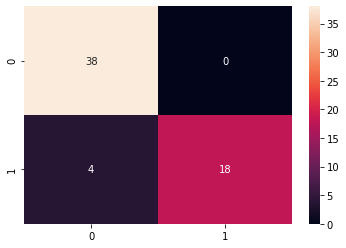

In [24]:
print(confusion_matrix(ytest,p))
sns.heatmap(confusion_matrix(ytest,p),annot=True)

### Specificity and Sensitivity

In [16]:
c = confusion_matrix(ytest,p)
print('Specificity: ', c[1,1]/(c[1,0]+c[1,1]))
print('Sensitivity: ', c[0,0]/(c[0,0]+c[0,1]))

Specificity:  0.8181818181818182
Sensitivity:  1.0


### Accuracy

In [17]:
c = confusion_matrix(ytest,p)
print('Accuracy: {:.2%}'.format((c[0,0]+c[1,1])/sum(sum(c))))

Accuracy: 93.33%
